<a href="https://colab.research.google.com/github/TangJiahui/6.036_Machine_Learning/blob/main/MIT_6_036_Fall_2020_Lab13_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MIT 6.036 Fall 2020: Lab13#

This colab notebook runs the companion code for question 2 in MIT 6.036 Lab 13. You can work out your solutions and save them for your checkoff discussion here. If you have not used colab before, ask your partner or a TA for help.

## <section>**Setup**</section>

First, run the next code block to download and import the code for this lab.

In [1]:
!rm -rf code_for_lab13* __MACOSX data .DS_Store
!wget --quiet --no-cache https://introml.odl.mit.edu/cat-soop/_static/6.036/labs/lab13/Q2/code_for_lab13.zip --no-check-certificate
!unzip code_for_lab13.zip
!mv code_for_lab13/* .
from code_for_lab13 import *

import pandas as pd
import numpy as np
from PIL import Image
import random
import re
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from tabulate import tabulate

Archive:  code_for_lab13.zip
  inflating: code_for_lab13/code_for_lab13.py  
   creating: code_for_lab13/data/
  inflating: code_for_lab13/data/dataCereal-grains-pasta.txt  
  inflating: code_for_lab13/data/dataDescriptions.txt  
  inflating: code_for_lab13/data/dataFats-oils.txt  
  inflating: code_for_lab13/data/dataFinfish-shellfish.txt  
  inflating: code_for_lab13/data/dataVegetables.txt  


# 2) Culinary Clustering

The US Department of Agriculture periodically publishes food guides, the most recent being MyPlate in 2011. These guides typically split foods into groups: grains, meats, fruits, vegetables, and dairy. You’ve been charged with creating the next installment of the food guide. You decide you want your food groups to be based on nutritional similarity. Luckily, we have access to the US Department of Agriculture Nutrient Database. The dataset we will be working with is a subset of the dataset so that it is more manageable.


Here are the names of the features you will be selecting from.

|                    |                      |                    |                    |                    |                    |                   |                    |                      |                     |
|--------------------|----------------------|--------------------|--------------------|--------------------|--------------------|-------------------|--------------------|----------------------|---------------------|
| Protein            | Fat                  | Carbohydrate       | Ash                | KCal               | Starch             | Sucrose           | Glucose            | Fructose             | Lactose             |
| Maltose            | Ethyl                | Water              | Adj Protein        | Caffeine           | Theobromine        | KJ                | Sugar              | Galactose            | Fiber               |
| Ca                 | Fe                   | Mg                 | P                  | K                  | Na                 | Zn                | Cu                 | F                    | Mn                  |
| Se                 | Vitamin A IU         | Retinol            | Vitamin A RAE      | Carotene b         | Carotene a         | Vitamin E         | Vitamin D          | Vitamin D2           | Vitamin D3          |
| Vitamin D t        | Cryptoxanthin        | Lycopene           | Lutein             | Tocopherol b       | Tocopherol g       | Tocopherol d      | Tocotrienol a      | Tocotrienol b        | Tocotrienol g       |
| Tocotrienol d      | Vitamin C            | Thiamin            | Riboflavin         | Niacin             | Pantothenic acid   | Vitamin B-6       | Folate total       | Vitamin B-12         | Choline             |
| Menaquinone-4      | Dihydrophylloquinone | Vitamin K          | Folic acid         | Folate food        | Folate DFE         | Betaine           | Tryptophan         | Threonine            | Isoleucine          |
| Leucine            | Lysine               | Methionine         | Cystine            | Phenylalanine      | Tyrosine           | Valine            | Arginine           | Histidine            | Alanine             |
| Aspartic acid      | Glutamic acid        | Glycine            | Proline            | Serine             | Hydroxyproline     | Vitamin E added   | Vitamin B-12 added | Cholesterol          | Fatty acids tt      |
| Fatty acids ts     | Fatty acids4:0       | Fatty acids6:0     | Fatty acids8:0     | Fatty acids10:0    | Fatty acids12:0    | Fatty acids14:0   | Fatty acids16:0    | Fatty acids18:0      | Fatty acids20:0     |
| Fatty acids18:1 u  | Fatty acids18:2 u    | Fatty acids18:3 u  | Fatty acids20:4 u  | Fatty acids22:6    | Fatty acids22:0    | Fatty acids14:1   | Fatty acids16:1 u  | Fatty acids18:4      | Fatty acids20:1     |
| Fatty acids20:5    | Fatty acids22:1 u    | Fatty acids22:5    | Phytosterols       | Stigmasterol       | Campesterol        | Beta-sitosterol   | Fatty acids tm     | Fatty acids tp       | Fatty acids15:0     |
| Fatty acids17:0    | Fatty acids24:0      | Fatty acids16:1 t  | Fatty acids18:1 t  | Fatty acids22:1 t  | Fatty acids18:2 t  | Fatty acids18:2 i | Fatty acids18:2 tt | Fatty acids18:2 CLAs | Fatty acids24:1 c   |
| Fatty acids20:2 n6 | Fatty acids16:1 c    | Fatty acids18:1 c  | Fatty acids18:2 n6 | Fatty acids22:1 c  | Fatty acids18:3 n6 | Fatty acids17:1   | Fatty acids20:3 u  | Fatty acids ttm      | Fatty acids ttp     |
| Fatty acids13:0    | Fatty acids15:1      | Fatty acids18:3 n3 | Fatty acids20:3 n3 | Fatty acids20:3 n6 | Fatty acids20:4 n6 | Fatty acids18:3i  | Fatty acids21:5    | Fatty acids22:4      | Fatty acids18:1-11t |

## 2.1) Getting a Taste for the Data

Use the `make_histogram` function in the Colab to get a rough estimate for the following questions.

### 2.1A) K (Potassium) vs Cystine ###
Compare the maximum value of K (Potassium) to that of Cystine. How many orders of magnitude apart are the two values?

Run the code cell below to visualize what the data looks like for each feature.

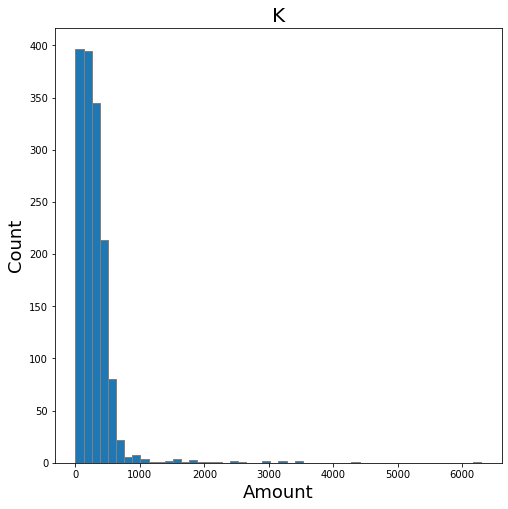

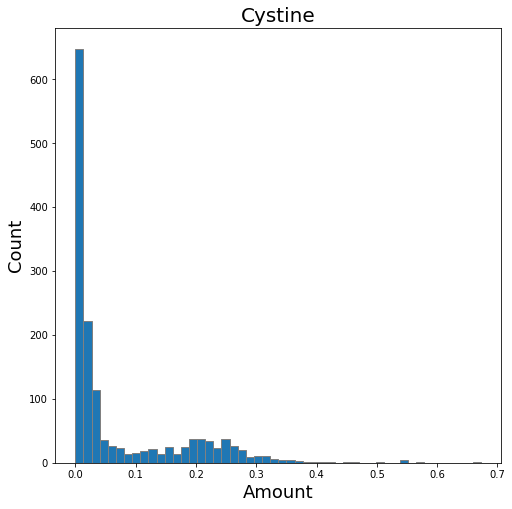

In [2]:
# Change the number of bins to increase or decrease the granularity of the histograms
make_histogram("K",nbins=50)
make_histogram("Cystine",nbins=50)

### 2.1B) Fatty acids20:4 n6###
Is the standard deviation for `"Fatty acids20:4 n6"` big or small? Would you want to include this in the feature set? Would including this hurt, help, or not impact our results?

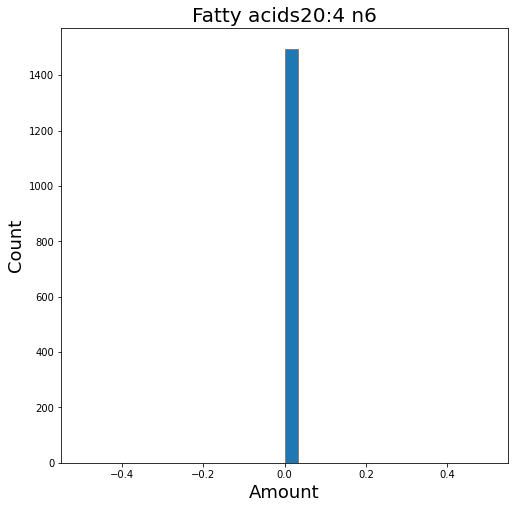

In [4]:
# Change the number of bins to increase or decrease the granularity of the histograms
make_histogram("Fatty acids20:4 n6",nbins=30)

###2.1C) Water vs Fatty acids20:4 n6###

Compare the `"Fatty acids20:4 n6"` histogram to that of the Water histogram. Which do you think would help separate the data better? How many clusterings do you see in the Water histogram? What do you think the means of these clusters are?


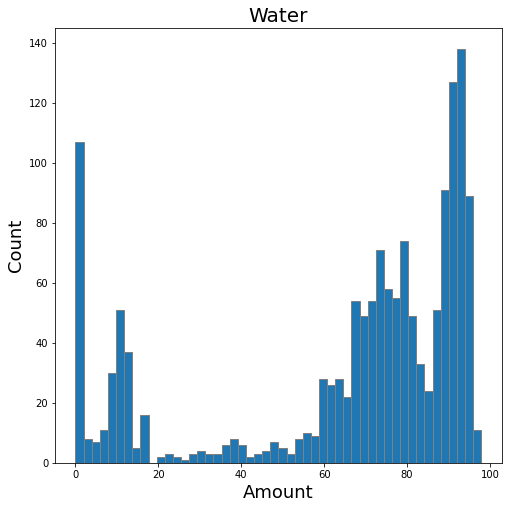

In [5]:
# Change the number of bins to increase or decrease the granularity of the histograms
make_histogram("Water",nbins=50)

# 2.2) K-ooking the Data

For these next sections, you will make use of the `kmeans` function. This will output up to 20 random samples from each cluster. To see the entire thing set `tableVerbose=True` and if you want to see a word cloud of the clusters set `wordcloud=True`.

### 2.2A) Clustering Data with Water
Now that our data is ready, let’s examine what our clusters would look like if we run the K-means algorithm using only one feature, Water, with `k=3`. Are you able to find any meaning behind these clusters? Compare the means you predicted in 2.1C to the actual results. (Scroll to the top of the ouput box.)

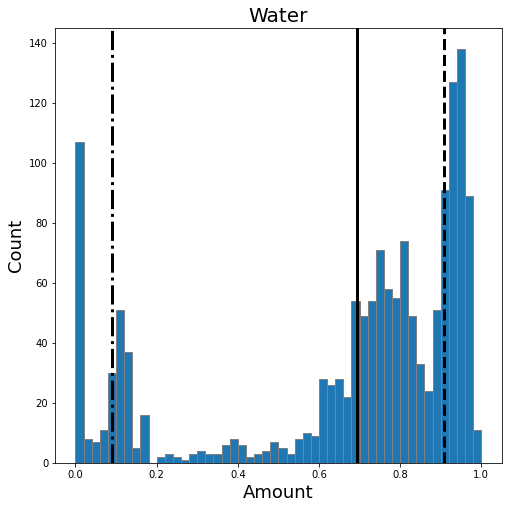

========    Cluster 1    ========
+---------------------------------------------------------+------------------------------------------------------------+----------------------------------+
| BEANS,KIDNEY,MATURE SEEDS,SPROUTED,CKD,BLD,DRND,WO/SALT | SALSIFY,CKD,BLD,DRND,W/SALT                                | PEPPERS,SWT,RED,SAUTEED          |
+---------------------------------------------------------+------------------------------------------------------------+----------------------------------+
| CHIVES,RAW                                              | BROCCOLI,FRZ,CHOPD,UNPREP                                  | SALAD DRSNG,SWT&SOUR             |
+---------------------------------------------------------+------------------------------------------------------------+----------------------------------+
| CRESS,GARDEN,CKD,BLD,DRND,W/SALT                        | WINGED BNS,IMMAT SEEDS,CKD,BLD,DRND,WO/SALT                | KALE,SCOTCH,RAW                  |
+-----------------------------

In [6]:
features = ["Water"] 
clusters = 3

kmeans(normalized_df,clusters,features,wordcloud=False,histogram=True,tableVerbose=False)

### 2.2B)
Let’s add more features so that we get more well-defined clusters. Try `k=4` for the following features: `"Protein", "Fat", "Carbohydrate", "Ash", "Water"`. What do each of these clusters correspond to? Are they perfect?

Note: Ash refers to any inorganic material, such as minerals, present in food. You can read more [here](https://www.livestrong.com/article/449416-what-is-ash-in-food/).

In [11]:
features = ["Protein","Fat","Carbohydrate","Ash","Water"]
clusters = 4

kmeans(normalized_df,clusters,features,wordcloud=False,tableVerbose=False)

========    Cluster 1    ========
+--------------------------------------------------------------+---------------------------------------------------+--------------------------------------------------------------+
| EEL,MXD SP,CKD,DRY HEAT                                      | PICKLE RELISH,HOT DOG                             | POTATOES,MSHD,DEHYD,PREP FROM GRAN W/ MILK,H2O & MARG ADDED  |
+--------------------------------------------------------------+---------------------------------------------------+--------------------------------------------------------------+
| SWEET POTATO,CND,MSHD                                        | LIMA BNS,IMMAT SEEDS,FRZ,BABY,CKD,BLD,DRND,W/SALT | RICE,WHITE,LONG-GRAIN,PRECKD OR INST,ENR,PREP                |
+--------------------------------------------------------------+---------------------------------------------------+--------------------------------------------------------------+
| MACARONI,PROTEIN-FORTIFIED,CKD,ENR,(N X 5.70)                | G

### 2.2C)
Now try `k=8`. What do these clusters represent? What happened to your 4 clusters from before?

In [9]:
features = ["Protein","Fat","Carbohydrate","Ash","Water"]
clusters = 8

kmeans(normalized_df,clusters,features,wordcloud=False,tableVerbose=False)

========    Cluster 1    ========
+-----------------------------------------------+---------------------------------+-----------------------------------------+
| TOMATO PRODUCTS,CND,SAU,W/MUSHROOMS           | SQUASH,WNTR,HUBBARD,BKD,W/ SALT | CARROT JUICE,CANNED                     |
+-----------------------------------------------+---------------------------------+-----------------------------------------+
| SQUASH,SMMR,CROOKNECK&STRAIGHTNECK,FRZ,UNPREP | NOPALES,CKD,WO/SALT             | PEPPERS,SWT,GRN,FRZ,CHOPD,UNPREP        |
+-----------------------------------------------+---------------------------------+-----------------------------------------+
| TURNIPS,FROZEN,UNPREPARED                     | FENNEL,BULB,RAW                 | PEAS,GRN,CND,REG PK,SOL&LIQUIDS         |
+-----------------------------------------------+---------------------------------+-----------------------------------------+
| KALE,FRZ,CKD,BLD,DRND,WO/SALT                 | KALE,SCOTCH,CKD,BLD,DRND,W/SALT | 

### 2.2D)
Now let’s try using all the features for `k=4`. How do these clusters compare to clusters from part 2.2B? When would we not want to use all the features for clustering?

In [10]:
features = list(normalized_df.columns)
features.remove("index")
clusters = 4

kmeans(normalized_df,clusters,features,wordcloud=False,tableVerbose=False)

========    Cluster 1    ========
+-------------------------------------------------------+------------------------------------------------------------+-----------------------------------------+
| SWEET POTATO PUFFS,FRZ,UNPREP                         | BAMBOO SHOOTS,RAW                                          | BURDOCK ROOT,CKD,BLD,DRND,WO/SALT       |
+-------------------------------------------------------+------------------------------------------------------------+-----------------------------------------+
| LENTILS,SPROUTED,RAW                                  | TOMATO PRODUCTS,CND,SAU,W/ONIONS,GRN PEPPERS,&CELERY       | MAYONNAISE,MADE WITH TOFU               |
+-------------------------------------------------------+------------------------------------------------------------+-----------------------------------------+
| SEAWEED,KELP,RAW                                      | SALAD DRSNG,FRENCH DRSNG,RED FAT,WO/ SALT                  | FENNEL,BULB,RAW                         |


Now that we've gone through an example, feel free to experiment with different feature sets and different k's if you have time. The list of all the feature names can be found in the table above.